In [84]:
import matplotlib.image as mpimg
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import json
from glob import glob
from tqdm import tqdm

In [2]:
files = glob('../img/raw/*.jpg')
files

['../img/raw/iStock-1064535870.jpg',
 '../img/raw/iStock-1319063120.jpg',
 '../img/raw/iStock-1319063121.jpg',
 '../img/raw/iStock-1187840076.jpg',
 '../img/raw/iStock-1064533888.jpg',
 '../img/raw/iStock-1010993082.jpg',
 '../img/raw/iStock-1180803849.jpg',
 '../img/raw/iStock-1183151489.jpg',
 '../img/raw/iStock-1181452243.jpg',
 '../img/raw/iStock-1181040248.jpg']

In [ ]:
imgs = [mpimg.imread(file) for file in files]

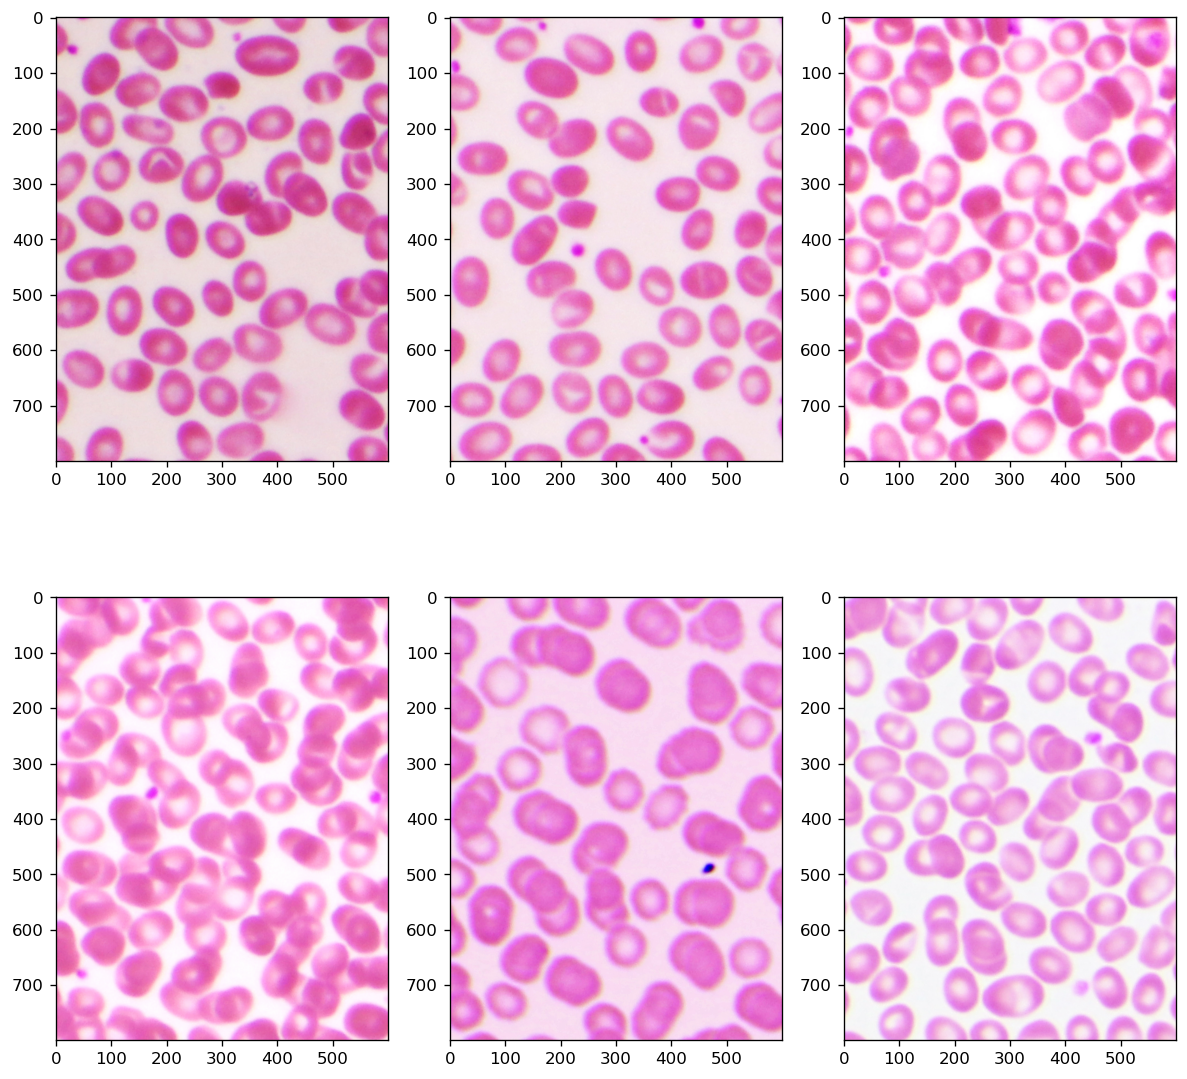

In [12]:
fig, ax = plt.subplots(ncols=3, nrows=2, dpi=120, figsize=(10, 10))

ax[0][0].imshow(imgs[1][:800,:600])
ax[0][1].imshow(imgs[2][:800,:600])
ax[0][2].imshow(imgs[3][:800,:600])
ax[1][0].imshow(imgs[7][:800,:600])
ax[1][1].imshow(imgs[8][:800,:600])
ax[1][2].imshow(imgs[9][:800,:600])
plt.tight_layout()

In [3]:
h, w = 600, 800
Dh, Dw = 200, 200

In [18]:
for file in tqdm(files[1:4] + files[7:10], desc="file", position=0):
    im = mpimg.imread(file)
    H, W, C = im.shape
    n = (W - w) // Dw
    m = (H - h) // Dh
    for i in tqdm(range(m), desc="height", position=1, leave=False):
        for j in tqdm(range(n), desc="width", position=2, leave=False):
            fileName = '../img/patches/' + file.split('/')[-1].split('.')[0] + '-{:03d}-{:03d}.jpg'.format(j, i)
            # print(fileName)
            mpimg.imsave(fileName, im[i * Dh : i * Dh + h, j * Dw : j * Dw + w, :])

file:   0%|          | 0/6 [00:00<?, ?it/s]






























































































































file:  17%|█▋        | 1/6 [00:24<02:00, 24.13s/it]







































































































































file:  33%|███▎      | 2/6 [00:53<01:47, 26.99s/it]



































































































































file:  50%|█████     | 3/6 [01:19<01:20, 26.85s/it]


































































































































file:  67%|██████▋   | 4/6 [01:46<00:53, 26.91s/it]



















































































































file:  83%|████████▎ | 5/6 [02:12<00:26, 26.37s/it]





























































In [13]:
len(imSlices), n * m

(1568, 1568)

In [14]:
slices = iter(imSlices)

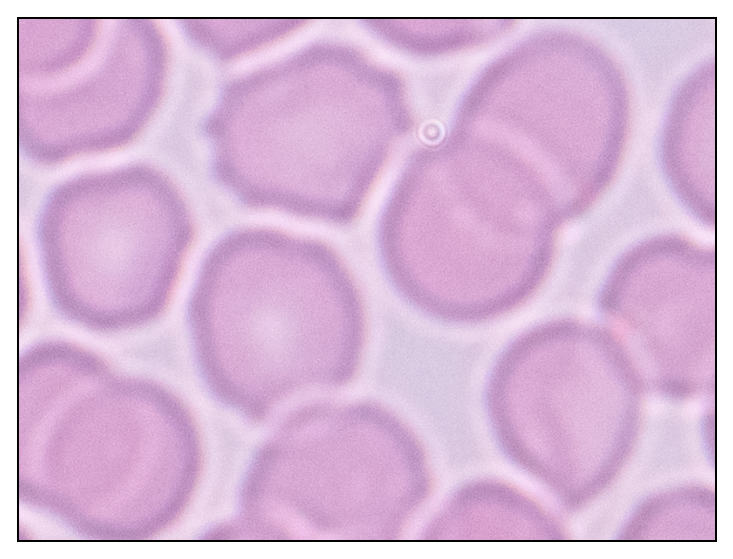

In [82]:
slice = next(slices)

fig, ax = plt.subplots(figsize=(5, 5), dpi=180)

ax.imshow(slice)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

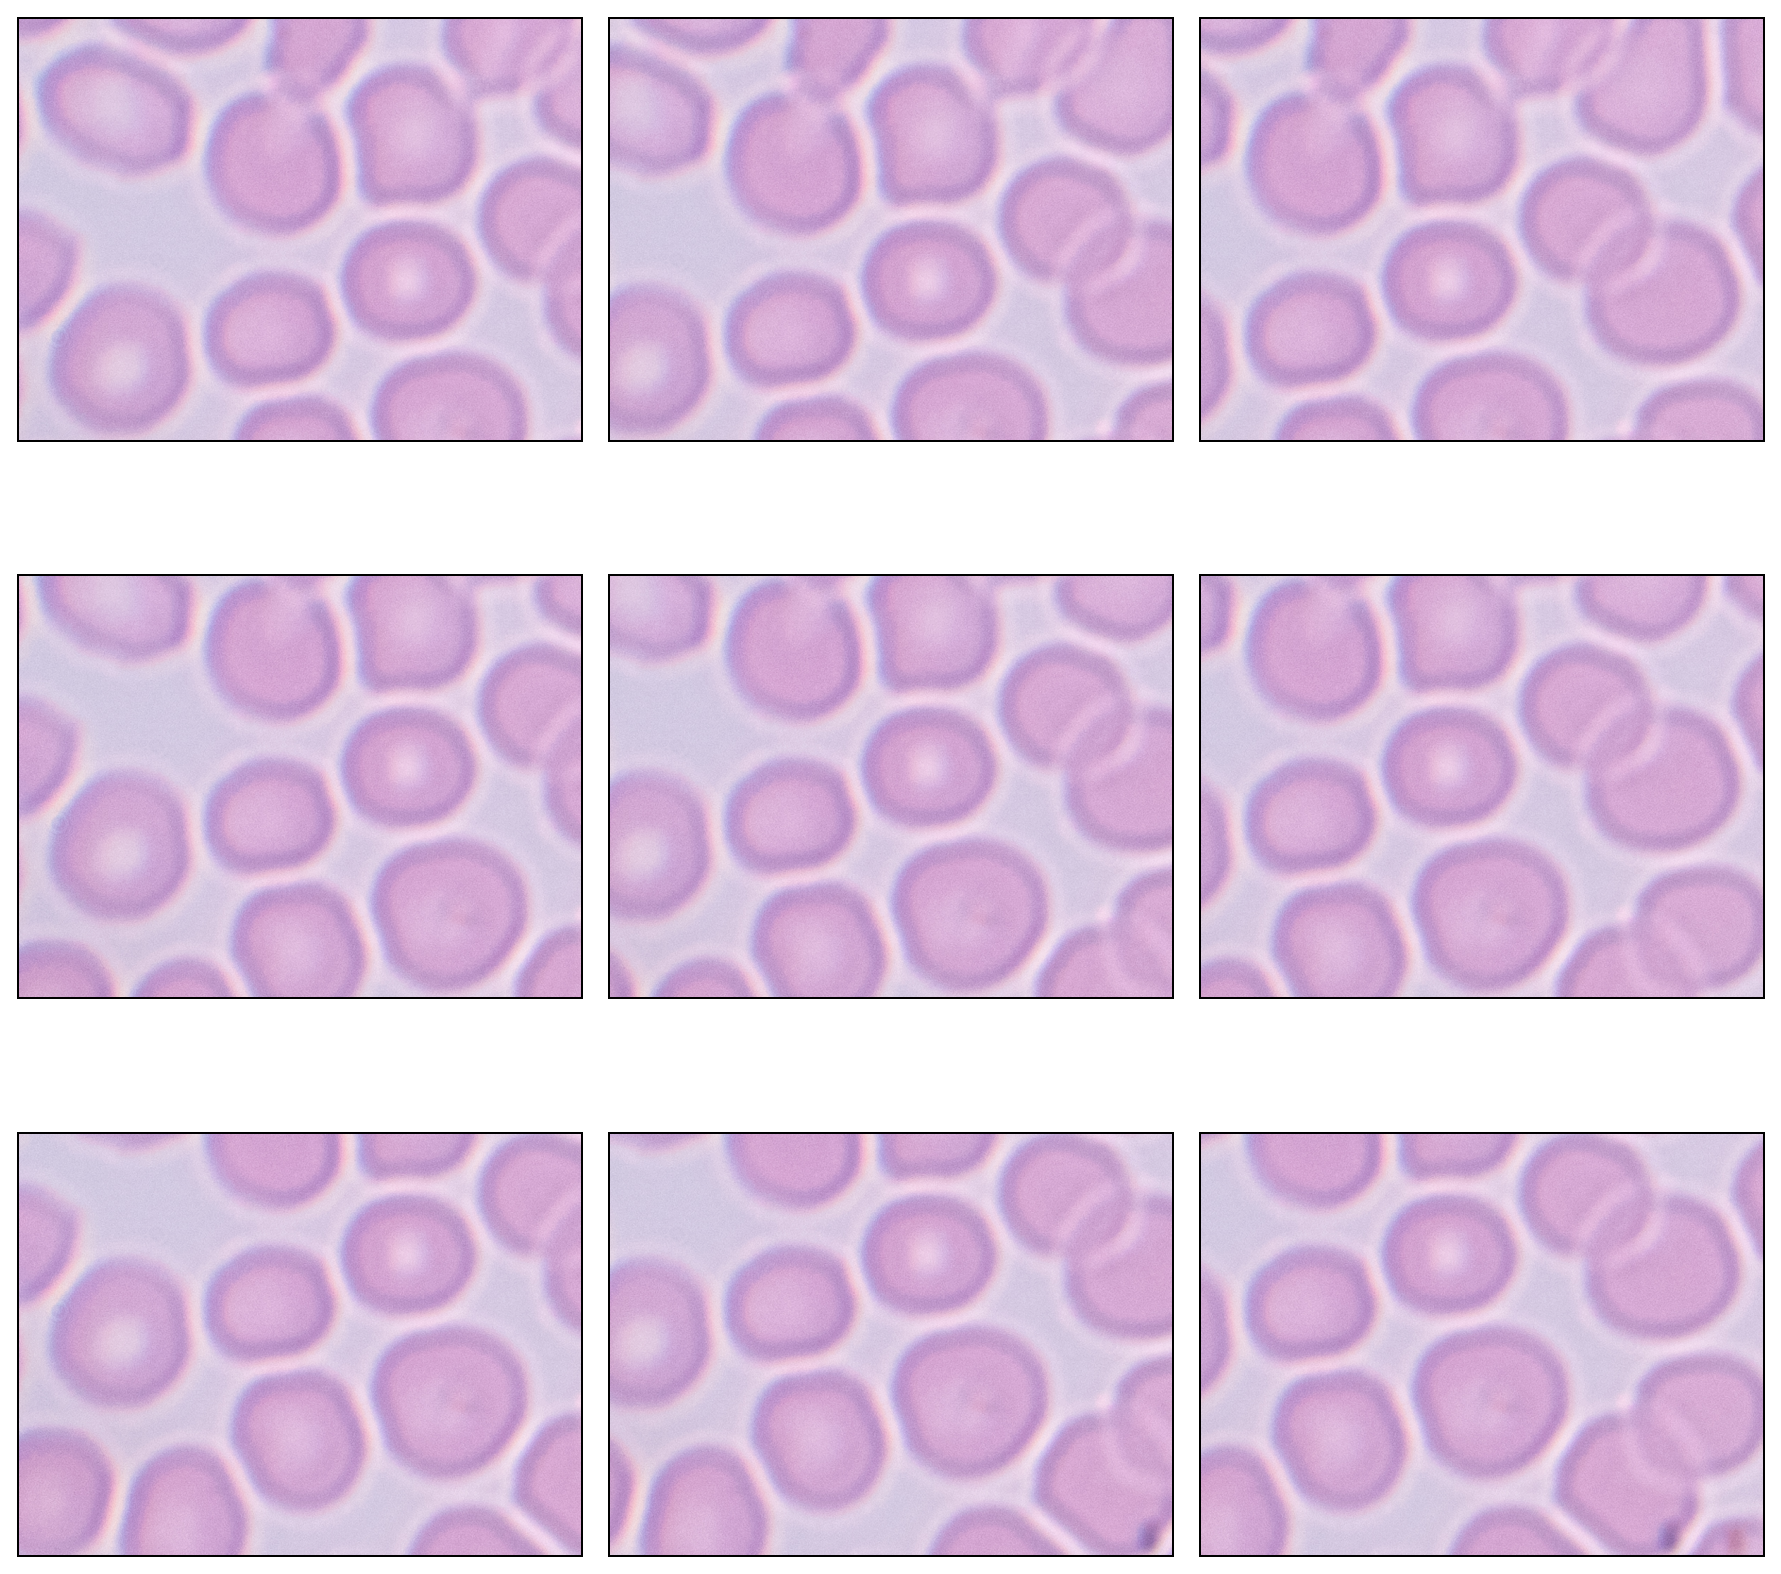

In [6]:
m, n = 3, 3

fig, ax = plt.subplots(figsize=(10, 10), dpi=180, nrows=m, ncols=n, sharex=True, sharey=True)

for i in range(m):
    for j in range(n):
        ax[i][j].imshow(im[i * Dh : i * Dh + h, j * Dw : j * Dw + w, :])
        ax[i][j].get_xaxis().set_visible(False)
        ax[i][j].get_yaxis().set_visible(False)

plt.tight_layout()

In [94]:
with open(file.replace('images', 'jsons').replace('jpg', 'json'), 'rt') as f:
    labels = json.load(f)

xi = int(labels['Cell_0']['x1'])
xf = int(labels['Cell_0']['x2'])
yi = int(labels['Cell_0']['y1'])
yf = int(labels['Cell_0']['y2'])

l1, l2 = labels['Cell_0']['Label1'], labels['Cell_0']['Label2'] 
l =  l1 + ' | ' + l2 if l1 != l2 else l1

xi, xf, yi, yf, l

(1913, 2488, 1944, 2519, 'Neutrophil')

In [154]:
files = iter(glob('../img/95-5-10-1/images/*.jpg'))

3624 2988 318


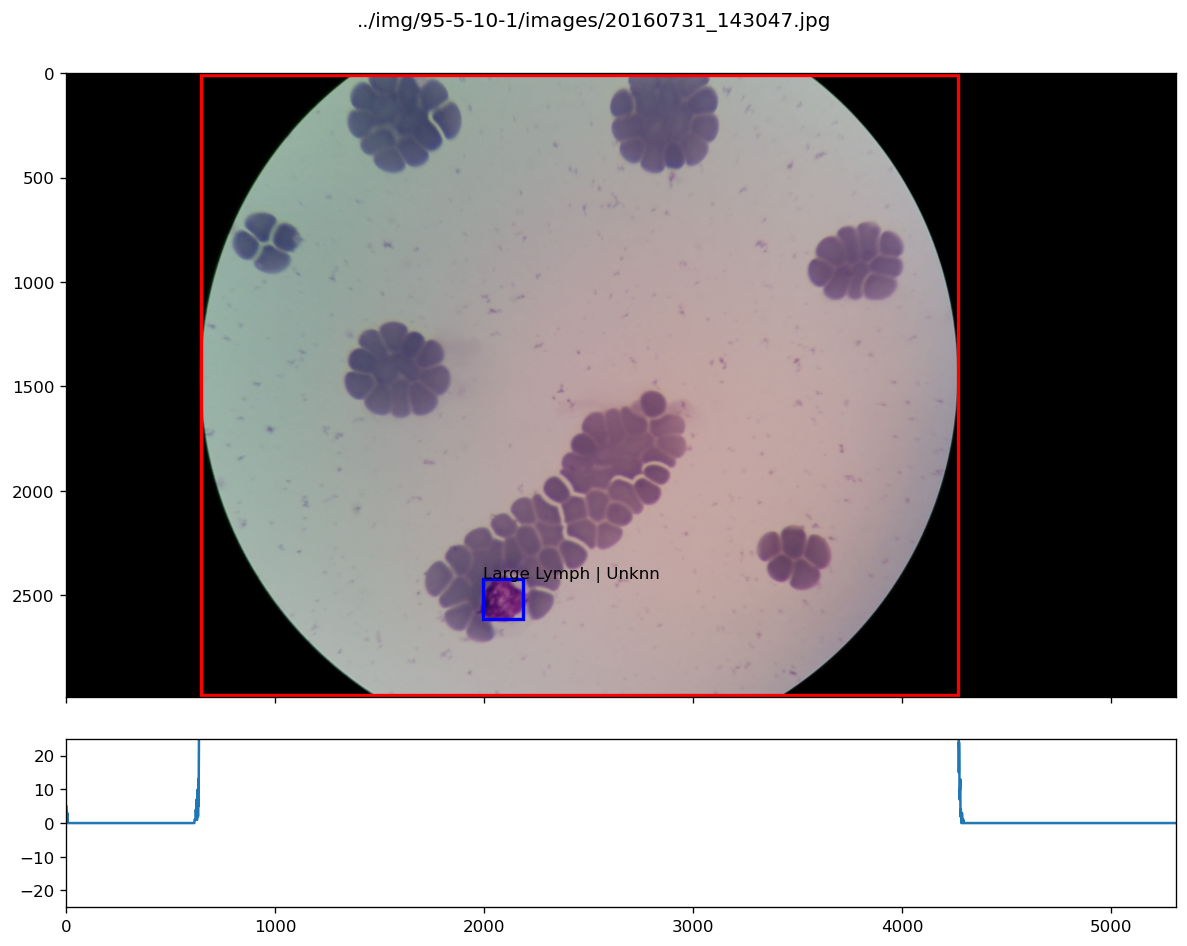

In [212]:
fig, ax = plt.subplots(nrows=2, figsize=(10, 8), dpi=120, sharex=True, gridspec_kw={'height_ratios': [4, 1]})

file = next(files)
im = mpimg.imread(file)

X, Y, C = im.shape

slice = im.sum(axis=2)[X // 2]

for i in range(100, Y // 2):
    if slice[i] > 100:
        ystart = i
        break
for i in range(Y - 100, Y // 2, -1):
    if slice[i] > 100:
        yend = i
        break
Dy = yend - ystart
print(yend - ystart, X, -(X - yend + ystart) // 2)
ax[0].imshow(im)
rect = patches.Rectangle((ystart, 10), yend - ystart, X - 20, linewidth=2, edgecolor='r', facecolor='none')
ax[0].add_patch(rect)
ax[1].plot(slice)
ax[1].set_ylim(-25, 25)
fig.suptitle(file)

with open(file.replace('images', 'jsons').replace('jpg', 'json'), 'rt') as f:
    labels = json.load(f)

stop = False
i = 0

while (not stop):

    try:
        label = labels[f'Cell_{i}']
        xi = int(label['x1'])
        xf = int(label['x2'])
        yi = int(label['y1'])
        yf = int(label['y2'])
        dx = xf - xi
        dy = yf - yi


        l1, l2 = label['Label1'], label['Label2'] 
        l =  l1 + ' | ' + l2 if l1 != l2 else l1

        rect = patches.Rectangle((xi + dx // 3, yi + dy // 3), dx // 3, dy // 3, linewidth=2, edgecolor='b', facecolor='none')
        ax[0].add_patch(rect)
        ax[0].text(xi + dx // 3, yi + dy // 3, l)

        i += 1
    except KeyError as e:
        stop = True

plt.tight_layout()

In [186]:
with open('../img/test.json', 'rt') as f:
    testJson = json.load(f)

testJson

{'images': [{'id': 1,
   'width': 800,
   'height': 600,
   'file_name': 'iStock-1181452243-009-004.jpg',
   'coco_url': 'AmlDatastore://bloodcellslabeling_datastore/iStock-1181452243-009-004.jpg',
   'absolute_url': 'https://bloodcells.blob.core.windows.net/images/iStock-1181452243-009-004.jpg',
   'date_captured': '2023-06-09T00:03:12.4167402Z'}],
 'annotations': [{'id': 1,
   'category_id': 1,
   'image_id': 1,
   'area': 8360.0,
   'bbox': [273.0, 122.0, 110.0, 76.0]},
  {'id': 2,
   'category_id': 1,
   'image_id': 1,
   'area': 5852.0,
   'bbox': [359.0, 172.0, 77.0, 76.0]},
  {'id': 3,
   'category_id': 1,
   'image_id': 1,
   'area': 5037.0,
   'bbox': [286.0, 207.0, 69.0, 73.0]},
  {'id': 4,
   'category_id': 1,
   'image_id': 1,
   'area': 6478.0,
   'bbox': [315.0, 214.0, 82.0, 79.0]},
  {'id': 5,
   'category_id': 1,
   'image_id': 1,
   'area': 5313.0,
   'bbox': [185.0, 165.0, 69.0, 77.0]},
  {'id': 6,
   'category_id': 1,
   'image_id': 1,
   'area': 6314.0,
   'bbox': [